<p align="center" ><img src="https://www.ai4kids.ai/wp-content/uploads/2019/07/ai4kids_website_logo_120x40.png"></img></p>

# 學AI真簡單 <1> 初探機器學習
## 第三章 3-2 房價秒預測—線性迴歸介紹與應用



<p align="right">© Copyright AI4kids.ai</p>

# 1. 載入所需套件

In [ ]:
# 此部分為補充內容，提供同學參考
# 繪圖套件模組，將資料圖形化顯示，教易觀察
%matplotlib inline
import matplotlib.pyplot as plt
# 資料分析模組，將資料表格化顯示，教易觀察
import pandas as pd

In [ ]:
# 如果要使用一些datasets，都會放在sklearn的datasets下面
# Toy datasets: https://scikit-learn.org/stable/datasets/index.html
# 從 sklearn 載入波士頓房價的資料集
from sklearn.datasets import load_boston

# 載入我們會用到的模型，線性回歸模型
from sklearn.linear_model import LinearRegression

# 載入切分資料集成訓練集及測試集的套件，train_test_split
from sklearn.model_selection import train_test_split

# 載入驗證模型的套件，mean_square_error
from sklearn.metrics import mean_squared_error

# 2. 載入資料集，觀察資料集

In [ ]:
# 載入資料集，放到 my_data變數內
my_data = load_boston()

# 可以把 my_data 給印出來，看一下裡面的內容
# 印出來後可知他有幾個 key name 有："data","target","target_names","DESCR","filename" ...等
print(my_data)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [ ]:
my_data.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
# 直接觀察有哪些 key 在資料集內
print(my_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [ ]:
print(my_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 欄位資訊 
https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html 或 print(my_data.DESCR)
* CRIM: 城鎮居民人均犯罪率
* RM: 住宅平均房間數量
* LSTAT: 區域中被認為是低收入階層的比率
* PTRATIO: 鎮上學生與教師數量比例
* MEDV: 房屋的中值價格

## 補充: Colab Keyboard Shortcuts
<font color=green>**Ctrl + M + H**</font>

In [ ]:
# 觀察資料筆數
print("資料筆數:")
print(my_data.data.shape)
# print("\n")

資料筆數:
(506, 13)


In [ ]:
# 觀察我們資料的欄位名稱
print("資料的欄位名稱，分別是:")
print(my_data.feature_names)
print("\n")

資料的欄位名稱，分別是:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']




In [ ]:
# 觀察我們第一筆的資料內容
print("第一筆的資料內容:")
print(my_data.data[1])
print("\n")

# 觀察我們第一筆的預測目標
print("第一筆的目標值(真實值):")
print(my_data.target[1])
print("\n")

# 每個 sklearn 所附的資料集都有 DESCR 這個key可以選來看，代表這個資料集的描述(description的縮寫)
# 這邊礙於篇幅的關係先註解掉了，讀者可以自行把註解拿掉執行看看
# print(my_data.DESCR)

第一筆的資料內容:
[2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
 7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
 9.1400e+00]


第一筆的目標值(真實值):
21.6




In [ ]:
# 補充: 將資料表格化呈現
# 將data轉化成表格
boston_pd = pd.DataFrame(my_data.data)
# 設定表格欄位名稱
boston_pd.columns = my_data.feature_names
# 顯示表格前5筆資料
print(boston_pd.head())
# 將target合併至表格成PRICE欄位
boston_pd['PRICE'] = my_data.target
print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]
      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]


# 3. 切分資料集 - 訓練集 / 測試集


In [ ]:
# 我們將資料切分成兩組，把80%當成訓練集，20%當成測試集
# (train_x, train_y) 為80%的訓練集，用來訓練模型
# (test_x , test_y ) 為20%的測試集，用來驗證模型的預測能力

train_x, test_x, train_y, test_y = train_test_split(
        my_data.data, my_data.target, test_size=0.25, random_state=43, shuffle=True)

# 可以看一下這些資料集的維度，驗證沒有切錯
print("原始資料集的維度大小:" , my_data.data.shape)
print("訓練集的維度大小:   " , train_x.shape)
print("測試集的維度大小:   " , test_x.shape)

原始資料集的維度大小: (506, 13)
訓練集的維度大小:    (379, 13)
測試集的維度大小:    (127, 13)


# 4. 訓練模型及驗證模型

In [ ]:
# 把預先載入好的套件「線性回歸模型」拿出來使用，並且存到變數my_model中
my_model = LinearRegression()

# 訓練模型，放入要訓練的訓練集(train_x, train_y)
my_model.fit(train_x, train_y)

# 訓練完模型後，我們就可以用 my_model 來預測測試集，產生出我們的預測值，存到 pred 變數內
pred = my_model.predict(test_x)

# 接著就可以使用我們的評估指標 MSE (mean_squared_error) 來評估我們模型的實際誤差
# 注意MSE分數是越接近 0 越好，代表預測的值與真實答案相差無幾
score = mean_squared_error(test_y, pred)
print("模型評估完測試集的MSE: ", score)

模型評估完測試集的MSE:  26.273991426429124


In [ ]:
import numpy as np
np.sqrt(score)

# score ** 0.5

4.692399540693487

Text(0, 0.5, '預測房價')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23526 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 30495 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 23526 missing from current font.
  font.set_te

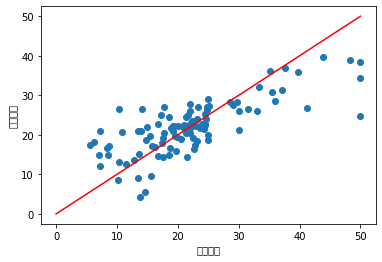

In [ ]:
# 補充: 圖形化展示結果
plt.scatter(test_y, pred)
plt.plot([0, 50], [0, 50], 'r')
plt.xlabel("真實房價")
plt.ylabel("預測房價")

### Q: 那麼可以不要使用全部的13個特徵來訓練模型嗎?
### A: 我們可以嘗試看看只拿其中的4個特徵來訓練看看!

In [ ]:
# 挑選其中的 4個特徵
# 這裡的 , 前面如果填上數字代表著要哪些列(橫向), 填上 : 就是從最前面到最後面, 也就是全部都要
# 而, 後面代表著挑選哪些行(直向), 也就是特徵, 所以直接填上數字代表你要挑選特徵欄位的位置
train_x_f4 = train_x[:, [4,5,6,7]]
test_x_f4  = test_x[:, [4,5,6,7]] 


# 以下的程式碼與上一段的程式碼大同小異
# 大家可以練習看看，但是注意 train_x, train_y, test_x, test_y 的位置要放對哦!
model_f4 = LinearRegression()
model_f4.fit(train_x_f4, train_y)

pred = model_f4.predict(test_x_f4)

# 最後可以看看這次的預測分數如何，與上一段的分數做比較
score = mean_squared_error(test_y, pred)
print("模型評估完測試集的誤差: ", score)

模型評估完測試集的誤差:  39.04445392463858
